# Create Random Data to Visualize

In [15]:
import pandas as pd
import numpy as np

np.random.seed(0)
N = 100
D = ['A', 'B', 'C']
df = {
    'c1': np.random.rand(N),
    'c2': np.random.rand(N),
    'd1': np.random.choice(D, N),
    'd2': np.random.choice(D, N),
}
df = pd.DataFrame(df)
datasets = [
    ('Continuous-Continuous', 'c1', 'c2'),
    ('Continuous-Discrete', 'c1', 'd1'),
    ('Discrete-Discrete', 'd1', 'd2'),
]

# Visualize with Plotly

In [16]:
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, 
    cols=len(datasets),
    horizontal_spacing=0.15,
    subplot_titles=[title for title, _, _ in datasets]
)

for i, (title, x, y) in enumerate(datasets):
    # Continuous-Continuous
    if 'c' in x and 'c' in y:
        scatter = px.scatter(df, x='c1', y='c2', color='d1')
        for trace in scatter.data:
            fig.add_trace(trace, row=1, col=i+1)
        fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')), selector=dict(type='scatter'), row=1, col=i+1)
    # Continuous-Discrete
    elif 'c' in x and 'd' in y:
        agg_df = df.groupby('d1', as_index=False).agg({'c1': 'mean'})
        bar = px.bar(agg_df, x='d1', y='c1', color='d1')
        for trace in bar.data:
            fig.add_trace(trace, row=1, col=i+1)
    # Discrete-Discrete
    else:
        heatmap = px.density_heatmap(df, x='d1', y='d2', color_continuous_scale='Viridis')
        for trace in heatmap.data:
            fig.add_trace(trace, row=1, col=i+1)
        fig.update_coloraxes(showscale=False)

fig.update_layout(
    title_text='Plotly Subplots with Different Data Types',
    template='simple_white',
    width=1200,
    height=400,
    showlegend=False,
)
fig.show()

# Export as svg
fig.write_image('plots/plotly.svg')

# Visualize with Altair

In [17]:
import altair as alt
charts = []

for title, x, y in datasets:
    # Continuous-Continuous
    if 'c' in x and 'c' in y:
        chart = alt.Chart(df).mark_point(filled=True, size=80, opacity=0.8).encode(
            x=alt.X('c1', title='c1'),
            y=alt.Y('c2', title='c2'),
            color=alt.Color('d1:N', title='d1')
        ).properties(
            title=title,
            width=350,
            height=350
        )
    # Continuous-Discrete
    elif 'c' in x and 'd' in y:
        chart = alt.Chart(agg_df).mark_bar().encode(
            x=alt.X('d1:N', title='d1'),
            y=alt.Y('c1:Q', title='mean(c1)'),
            color=alt.Color('d1:N', legend=None)
        ).properties(
            title=title,
            width=350,
            height=350
        )
    # Discrete-Discrete
    else:
        chart = alt.Chart(df).mark_rect().encode(
            x=alt.X('d1:N', title='d1'),
            y=alt.Y('d2:N', title='d2'),
            color=alt.Color('count():Q', scale=alt.Scale(scheme='viridis'), legend=alt.Legend(title='count'))
        ).properties(
            title=title,
            width=350,
            height=350
        )
    charts.append(chart)

plot = alt.hconcat(*charts).properties(
    title='Altair Subplots with Different Data Types'
)
plot.show()

# Export as svg
plot.save('plots/altair.svg')

alt.HConcatChart(...)

# Visualize with Seaborn

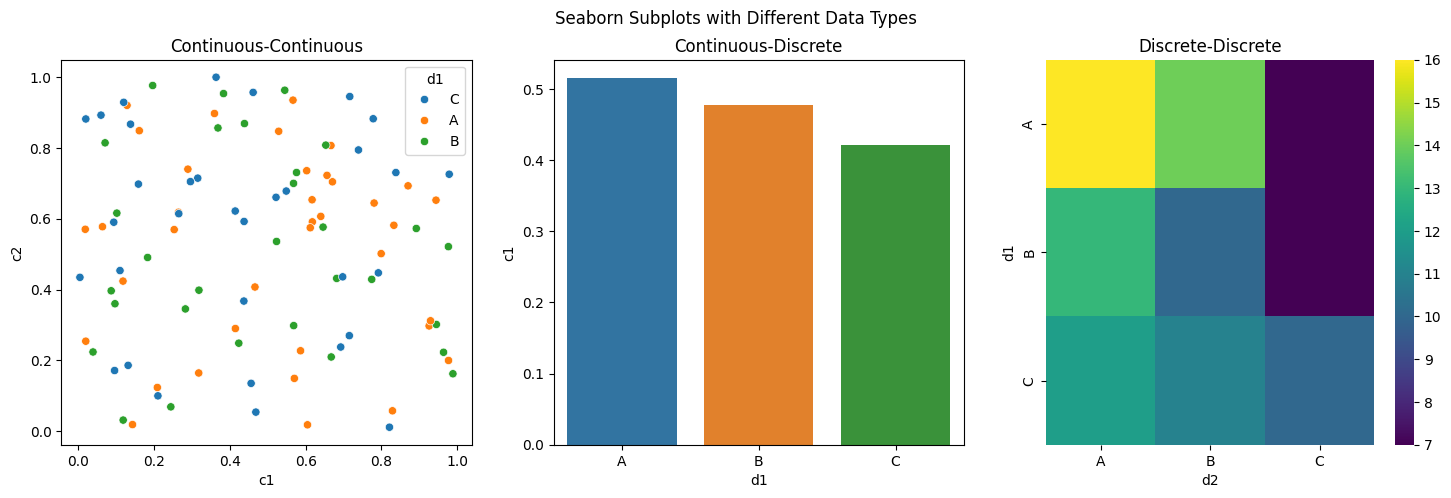

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Seaborn Subplots with Different Data Types')

# Continuous-Continuous
sns.scatterplot(data=df, x='c1', y='c2', hue='d1', ax=axes[0])
axes[0].set_title('Continuous-Continuous')

# Continuous-Discrete (bar plot of mean c1 by d1)
sns.barplot(data=agg_df, x='d1', y='c1', hue='d1', dodge=False, ax=axes[1])
axes[1].set_title('Continuous-Discrete')

# Discrete-Discrete (heatmap of counts)
pivot = df.pivot_table(index='d1', columns='d2', aggfunc='size', fill_value=0)
sns.heatmap(pivot, cmap='viridis', ax=axes[2])
axes[2].set_title('Discrete-Discrete')

plt.show()

# Export as svg
fig.savefig('plots/seaborn.svg', format='svg')

# Visualize with Matplotlib

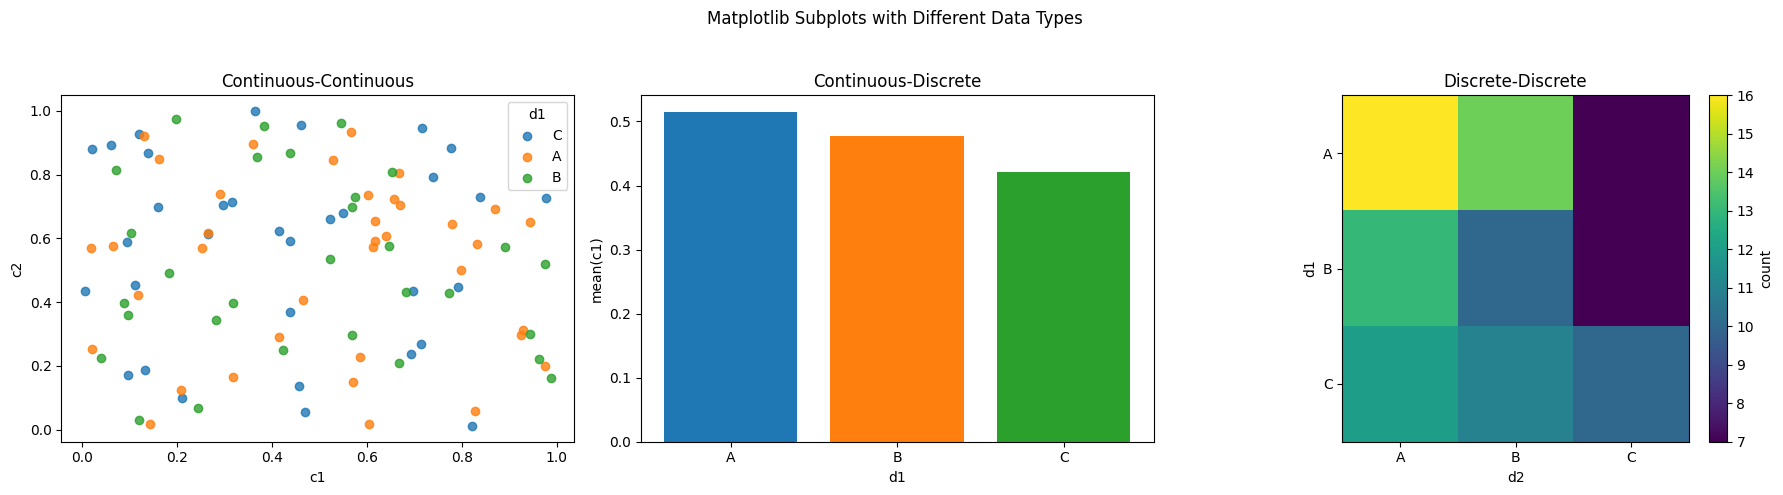

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Matplotlib Subplots with Different Data Types')

# Continuous-Continuous
for group in df['d1'].unique():
    mask = df['d1'] == group
    axes[0].scatter(df.loc[mask, 'c1'], df.loc[mask, 'c2'], label=group, alpha=0.8)
axes[0].set_title('Continuous-Continuous')
axes[0].set_xlabel('c1')
axes[0].set_ylabel('c2')
axes[0].legend(title='d1')

# Continuous-Discrete
axes[1].bar(agg_df['d1'], agg_df['c1'], color=['C0', 'C1', 'C2'])
axes[1].set_title('Continuous-Discrete')
axes[1].set_xlabel('d1')
axes[1].set_ylabel('mean(c1)')

# Discrete-Discrete
im = axes[2].imshow(pivot.values, cmap='viridis')
axes[2].set_xticks(np.arange(len(pivot.columns)))
axes[2].set_yticks(np.arange(len(pivot.index)))
axes[2].set_xticklabels(pivot.columns)
axes[2].set_yticklabels(pivot.index)
axes[2].set_xlabel('d2')
axes[2].set_ylabel('d1')
axes[2].set_title('Discrete-Discrete')
fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04, label='count')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Export as svg
fig.savefig('plots/matplotlib.svg', format='svg')